<a href="https://colab.research.google.com/github/lakshya620/ML_assignment1/blob/main/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# **Binary Classification** 

---




## Data Loading

In [ ]:
url = 'https://raw.githubusercontent.com/lakshya620/ML_assignment1/main/health_data.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df1.head()

,age,restbps,chol,category
0,26,109,243,0
1,27,106,156,0
2,28,107,225,0
3,27,105,277,0
4,30,96,221,0


In [ ]:
df1.describe()

,age,restbps,chol,category
count,700.000000,700.000000,700.000000,700.000000
mean,41.777143,125.434286,256.252857,0.428571
std,14.571477,18.302340,55.129140,0.495226
min,15.000000,92.000000,143.000000,0.000000
25%,28.000000,109.000000,219.000000,0.000000
50%,42.000000,125.000000,243.000000,0.000000
75%,53.000000,140.000000,287.000000,1.000000
max,78.000000,173.000000,433.000000,1.000000


We have 3 dimensional feature vector 
Now we will stack up all feature vectors 
in X

Input and Output Data
>$X =
 \begin{pmatrix}
  x_{1}^T  \\
  x_{2}^T \\
  \vdots  \\
  x_{m}^T
 \end{pmatrix}$
 >where the feature vector is 
 >$x_{i} =
 \begin{pmatrix}
  age_{i}  \\
  restbps_{i} \\
  chol_{i}
 \end{pmatrix}$ 
 where $m$ =no of data points=$700$ and
 >$Y =
 \begin{pmatrix}
  y_{1}  \\
  y_{2} \\
  \vdots  \\
  y_{m}
 \end{pmatrix}$ 


In [ ]:
D=df1.to_numpy()
np.random.shuffle(D)#done for test and train data split
m=D.shape[0];
n=D[0].shape[0]-1
X= D[:,:3]# data vector with  feature/input vectors stacked up on one another 
Y=D[:,-1]
print(X.shape)
print(Y.shape)

(700, 3)
(700,)


## Training Data and Test Data Split

In [ ]:
split=int(m*0.7)
X_train,X_test=X[:split],X[split:]
Y_train,Y_test=Y[:split],Y[split:]
print(X_train.shape)
print(Y_test.shape)

(489, 3)
(211,)


### Estimating class priors
$p_{0}=Pr(Y=0)=m_{0,train}/m_{train}\hspace{1cm}  p_{1}=Pr(Y=1)=m_{1,train}/m_{train}\hspace{0.25cm}$
where $ m_{0,train} \hspace{0.15cm}$is no of training data points having 0 label and m1 as 1

In [ ]:
m_train=X_train.shape[0]
m1=np.sum(Y_train, axis=0)
m0=m_train-m1
p0=m0/m_train
p1=m1/m_train
print(p0,p1)

0.5991820040899796 0.40081799591002043


## Naive Bayes Classification


### Estimating class conditional density
In naive bayes we make assumption that different features are independent of one another i.e  
$f_{i}(x)$(i.e pdf of feature vector x of class i)=$\prod_{d=0}^{n}f_{i}(x^d\hspace{0.15cm} |\hspace{0.15cm} y=i) $ where $x^d$ represents $d^{th}$ dimension of $n$ dimensional vector $x$


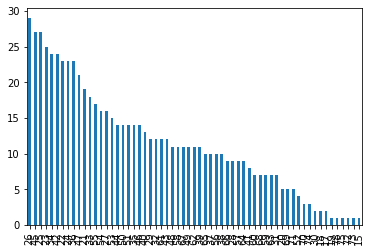

In [ ]:
df1['age'].value_counts().plot(kind='bar')

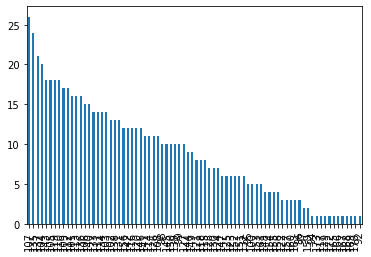

In [ ]:
df1['restbps'].value_counts().plot(kind='bar')

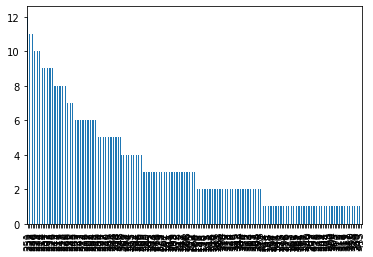

In [ ]:
df1['chol'].value_counts().plot(kind='bar')

Now since $d^{th}$ dimension $x^d \in \mathbb{R}$ looks like an exponential distribution we will assume exponential distribution from  training data i.e. $x^d\sim \mathcal{exp}(\lambda_{d})$ with $\mu_{d}= 1/\lambda_{d}$ 

In [ ]:
def classConditional(lambdas,x):
  if x<0:
    return 0
  else:
    ans=1
    for i in range(len(lambdas)):
      ans*=lambdas[i]*np.exp(x[i])
    return ans
def getLambdas(X_train):
  n=X_train.shape[1]
  lambdas=[]
  for i in range(n):
    lambdas.append(1/np.mean(X_train[:,i],axis=0))
  return lambdas
lambdas=getLambdas(X_train)

### Prediction on test point

In [ ]:
def predict(x):
  

## Maximum Likelihood Estimation




Although the graphical visualization of data suggests that the data does follow something similar to exponential distribution, for mathematical simplicity we assume that the data is a multivariate gaussian for mathematical simplicity instead of multivariate exponential.

For a multivariate gaussian distribution,from the ML estimation the parameters are mean and co-variance matrix and they are:

In [ ]:
mean_0 = [0,0,0]
mean_1 = [0,0,0]
count_0 = 0
count_1 = 0
X_train_0 = [ [ 0 for i in range(3) ] for j in range(m0) ]
X_train_1 = [ [ 0 for i in range(3) ] for j in range(m1) ]
for i in range(len(X_train)):
  if Y_train[i] == 0:
    mean_0 += X_train[i]
    X_train_0[count_0] = X_train[i]
    count_0 +=1
  elif Y_train[i] == 1:
    mean_1 += X_train[i]
    X_train_1[count_1] = X_train[i]
    count_1 +=1
  
mean_0 = mean_0 / count_0
mean_1 = mean_1 / count_1

cov_0 = np.cov(np.transpose(X_train_0))
cov_1 = np.cov(np.transpose(X_train_1))


Train accracy:

In [ ]:
def calculate_probability(x, mean, cov):
  A = x-mean
  At = np.transpose(A)
  cov_inv = np.linalg.inv(cov)
  pro = 
  exponent = math.exp(-1/2 * A * cov_inv * At)
  return (1/(math.sqrt(8*(math.pi)**3*np.linalg.det(cov)))) * exponent


correct_estimates = 0
for i in range(len(X_train)):
  q_1 = p1*calculate_probability(X_train[i],mean_1,cov_1)
  q_0 = p0*calculate_probability(X_train[i],mean_0,cov_0)
  if q_1 > q_0:
    if Y_train[i] == 1:
      correct_estimates+=1
  elif q_0 > q_1:
    if Y_train[i] == 0:
      correct_estimates+=1

accuracy = correct_estimates / m_train


TypeError: ignored

Test accuracy: